In [1]:
from scipy import misc
import numpy as np
import glob

png = []

for image_path in glob.glob("clustering2/*.png"):
    png.append(misc.imread(image_path))    

x_train = np.asarray(png)
x_train = x_train.astype('float32') / 255.
x_train = np.reshape(x_train,(len(x_train), 100))
print ('Importing done...', x_train.shape)

Importing done... (1000, 100)


Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Cluster memberships:
[ 0 -1  0  0  0  0  0  0  0  1  1  1  1  2  0  0  0  0  0  0  0  0  0  0  1
  0  0  1  1  1  1  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1  1  1  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1
  1 -1  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1 -1 -1  0 -1 -1  0
  0 -1  0 -1 -1  2  1  1  1  0  0 -1 -1 -1 -1  0 -1 -1 -1 -1  0 -1 -1  0  1
  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  1  1  0  0  0  0
  0  0  0  0 -1  0  0  0  0 -1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0
  0  1  0  1  1  1  1  0  0  0  0  0  1  0  0  0  2  1  1  1  0 -1 -1  0  1
 -1 -1  0 -1  0 -1 -1 -1 -1  0  1  1  1  1  1 -1 -1  0 -1  0 -1  0 -1 -1 -1
  0 -1 -1  1  1  1  1  0  0 -1  0 -1 -1 -1 -1  0 -1  0  0 -1 -1  2  1  1  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 

index is 9	index is 10	index is 11	index is 12	index is 24	index is 27	index is 28	index is 29	index is 30	index is 35	index is 45	index is 46	index is 47	index is 48	index is 63	index is 64	index is 65	index is 66	index is 81	index is 82	index is 83	index is 84	index is 99	index is 100	index is 102	index is 118	index is 131	index is 132	index is 133	index is 149	index is 150	index is 151	index is 152	index is 167	index is 169	index is 170	index is 185	index is 186	index is 187	index is 201	index is 203	index is 204	index is 205	index is 206	index is 212	index is 217	index is 218	index is 219	index is 224	index is 235	index is 236	index is 237	index is 238	index is 239	index is 253	index is 254	index is 255	index is 256	index is 272	index is 273	index is 274	index is 289	index is 291	index is 292	index is 293	index is 307	index is 308	index is 309	index is 310	index is 326	index is 327	index is 328	index is 344	index is 358	index is 359	index is 360	index is 375	index is 376	index is 3

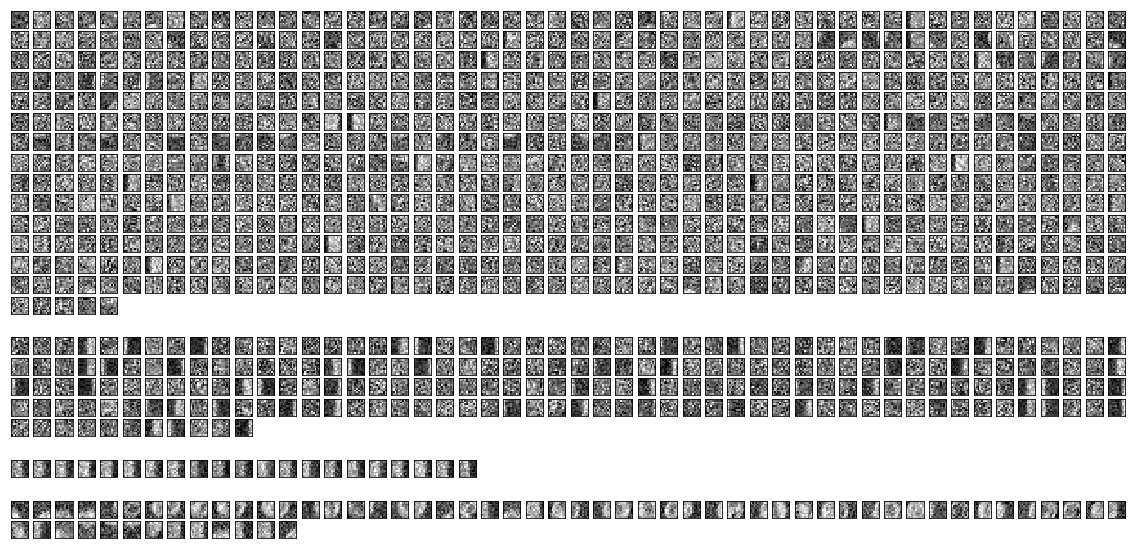

In [2]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
db = DBSCAN(eps=1.3, min_samples=10).fit(x_train)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Cluster memberships:\n{}\n".format(labels))

for i in range(n_clusters_):
    print("Cluster: %d" %i)
    count=0
    for j,a in enumerate(labels):
        if a==i:
            print('index is %d' % j, end='\t')
            count+=1
    print("\n")
    print("Cluster count is %d" %count)
    print("\n")

my_list = []
count_list = [0]
    
for i in range(n_clusters_):
    sub_list = []
    count=0
    my_list.append(sub_list)
    for j,a in enumerate(labels):
        if a==i:
            sub_list.append(j)
            count+=1
    count_list.append(count)
   
print("Cluster: -1")
count=0
sub_list = []
my_list.append(sub_list)
for j,a in enumerate(labels):
    if a==-1:
        print('index is %d' % j, end='\t')
        count+=1
        sub_list.append(j)
count_list.append(count)
print("\n")
print("Cluster count is %d" %count)
print("\n")
print("{}".format(count_list))
print("{}".format(my_list))

import matplotlib.pyplot as plt

n = 50

plt.figure(figsize=(20, 30))
plot_count=-100
for j in range(len(my_list)):
    plot_count+=(int((count_list[j]//50))*50+100)
    for i in range(len(my_list[j])):
        ax = plt.subplot(80, n, i+1+plot_count)
        plt.imshow(x_train[my_list[j][i]].reshape(10, 10))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
       
plt.show()